In [1]:
import pandas as pd

from data_processing import correct_nasal_vowel_transcripts
from stats import SuffixAverage
from visualization import view_curve

## Reversed vs Regular sequences

In [2]:
nlexique = pd.read_csv('../data/nlexique.csv')
nlexique['sg'] = nlexique['sg'].apply(correct_nasal_vowel_transcripts)
nlexique

,lexeme,variants,gen,sg,pl
0,à-côté,à-côté:accoté,m,akOte,akOte
1,à-coup,à-coup,m,aku,aku
2,à-peu-près,à-peu-près,m,apØpʁɛ,apØpʁɛ
3,à-pic,à-pic,m,apik,apik
4,à-plat,à-plat:aplat,m,apla,apla
...,...,...,...,...,...
31000,zurichois,zurichois,m,zyʁikwa,zyʁikwa
31001,zydeco,zydeco,f,zidəko,zidəko
31002,zygoma,zygoma,m,zigOma,zigOma
31003,zygote,zygote,m,zigɔt,zigɔt


In [3]:
echantinom = pd.read_csv('../data/Echantinom-full-20210902.csv')

echantinom = (echantinom[~echantinom['lemma'].isin(nlexique[nlexique['gen'] == 'b']['lexeme'])] # rows
                       [['lemma', 'phon', 'gen', 'suffix', 'suffix_broad']]    # columns
                       .fillna(0)
                       .reset_index(drop=True)
                       )

echantinom = (pd.merge(echantinom, nlexique, left_on='lemma', right_on='lexeme', how='left', suffixes=('', '_y'))
               .drop(columns=['lexeme', 'phon', 'gen_y'])
               .dropna()
               .reset_index(drop=True)
               )
echantinom

,lemma,gen,suffix,suffix_broad,variants,sg,pl
0,berlingue,m,0,0,berlingue,bɛʁl3g,bɛʁlɛ̃g
1,corton,m,on,on,corton,kɔʁt2,kɔʁtɔ̃
2,dabuche,f,uche,Vche,dabuche,dabyʃ,dabyʃ
3,faf,m,0,0,faf,faf,faf
4,gail,f,0,0,gail,gaj,gaj
...,...,...,...,...,...,...,...
4527,palu,m,0,0,palu:palus,paly,paly
4528,talc,m,0,0,talc,talk,talk
4529,sauvetage,m,age,age,sauvetage,sOvətaʒ,sOvətaʒ
4530,plaid,m,0,0,plaid,plɛd,plɛd


### Orthographic regular

In [ ]:
orth_reg = pd.read_csv('../results/echantinom_orth_preds_regular.csv')
# orth_reg = orth_reg.join(echantinom.set_index('lemma')[['suffix']], on='Form').drop_duplicates().reset_index(drop=True)
# orth_reg.to_csv('../results/echantinom_orth_preds_regular.csv', index=None)
orth_reg

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,suffix
0,té,te,f,m,"[('t', {'f': 0.056519728153944016, 'm': 0.9434...",test,0
1,bi,bi,m,m,"[('b', {'f': 0.1552123725414276, 'm': 0.844787...",test,0
2,as,as,m,m,"[('a', {'f': 0.6409672498703003, 'm': 0.359032...",test,0
3,an,1,m,m,"[('a', {'f': 0.6409672498703003, 'm': 0.359032...",test,0
4,tuf,tyf,m,m,"[('t', {'f': 0.056519728153944016, 'm': 0.9434...",test,0
...,...,...,...,...,...,...,...
4526,approvisionnement,apʁOvizjɔnəm1,m,m,"[('a', {'f': 0.6409672498703003, 'm': 0.359032...",test,ment
4527,sous-alimentation,suzalim1tasj2,f,f,"[('s', {'f': 0.07729556411504745, 'm': 0.92270...",test,ion
4528,cul-de-basse-fosse,kydəbasəfos,m,m,"[('c', {'f': 0.18727333843708038, 'm': 0.81272...",test,0
4529,transsubstantiation,tʁ1ssypst1tjasj2,f,f,"[('t', {'f': 0.056519728153944016, 'm': 0.9434...",test,ion


In [8]:
orth_reg_correct = orth_reg[orth_reg['Predicted Gender'] == orth_reg['True Gender']]

orth_reg_accuracy = (orth_reg_correct.shape[0] / orth_reg.shape[0]) * 100
orth_reg_accuracy

90.09048775104833

In [9]:
orth_reg_incorrect = orth_reg[orth_reg['Predicted Gender'] != orth_reg['True Gender']]
orth_reg_incorrect.sample(5)

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,suffix
466,vertu,vɛʁty,m,f,"[('v', {'f': 0.6663901209831238, 'm': 0.333609...",test,0
3016,mi-carême,mikaʁɛm,m,f,"[('m', {'f': 0.14564257860183716, 'm': 0.85435...",test,0
845,sauna,sOna,f,m,"[('s', {'f': 0.07729556411504745, 'm': 0.92270...",test,0
742,prion,pʁij2,f,m,"[('p', {'f': 0.24439361691474915, 'm': 0.75560...",test,0
1976,boisson,bwas2,m,f,"[('b', {'f': 0.1552123725414276, 'm': 0.844787...",test,onF


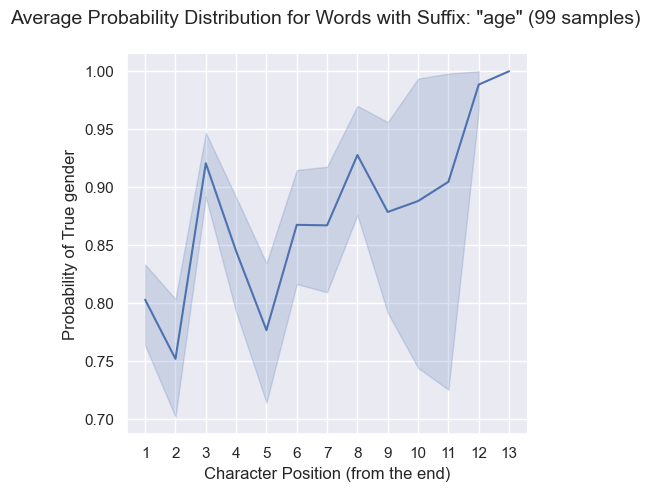

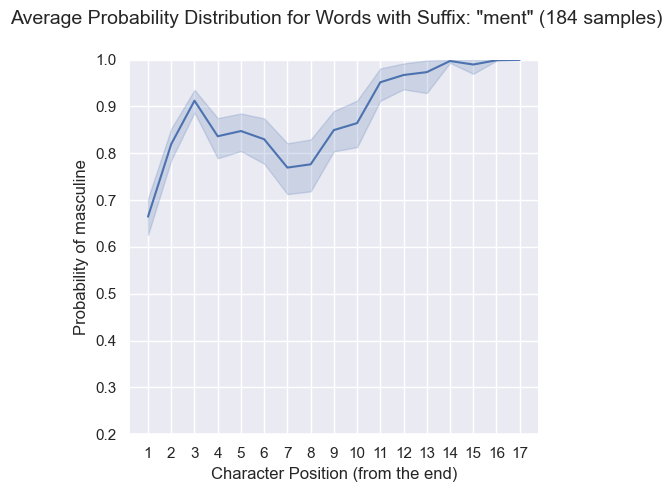

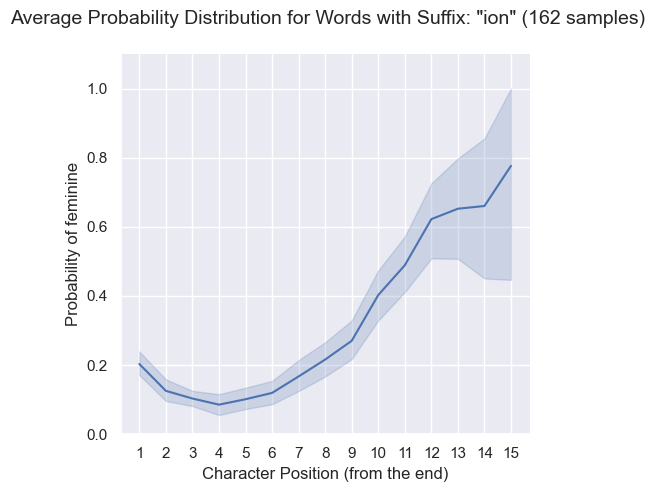

In [12]:
"""Uncomment to view the curves of individual example words"""
"""
Possible values for scale: 
- True (scales from 0 to 1), 
- False (default behavior), 
- List[int|float, int|float]: custom scaling range
"""

# view_curve(['passage'], orth_reg, binary=True, gender='f', display_probs=True, scale=False)
# print('-' * 100 + '\n')
# view_curve(['lignage'], orth_reg, binary=True, gender='f')
# print('-' * 100 + '\n')
# view_curve(['bâtiment'], orth_reg, binary=True, gender='f')
# print('-' * 100 + '\n')
# view_curve(['virement'], orth_reg, binary=True, gender='f')
# print('-' * 100 + '\n')
# view_curve(['formation'], orth_reg, binary=True, gender='f')
# print('-' * 100 + '\n')
# view_curve(['gradation'], orth_reg, binary=True, gender='f')

age_avg = SuffixAverage(orth_reg, 'age')
age_avg.plot(gender='True', scale=False)

ment_avg = SuffixAverage(orth_reg, 'ment')
ment_avg.plot(gender='m', scale=[0.2, 1])

ion_avg = SuffixAverage(orth_reg, 'ion')
ion_avg.plot(gender='f', scale=[0, 1.1], min_dp=3)

In [ ]:
orth_reg_preds_x10 = pd.read_csv('../results/echantinom_orth_preds_x10_regular.csv')
# orth_reg_preds_x10 = orth_reg_preds_x10.join(echantinom.set_index('lemma')[['suffix']], on='Form').drop_duplicates().reset_index(drop=True)
# orth_reg_preds_x10.to_csv('../results/echantinom_orth_preds_x10_regular.csv', index=None)

In [21]:
"""Uncomment to view the curves of an example word at each run"""

# view_curve(['gradation'], orth_reg_preds_x10, binary=True, gender='True', multiruns=True, display_probs=True, scale=[0, 1.1])

'Uncomment to view the curves of an example word at each run'

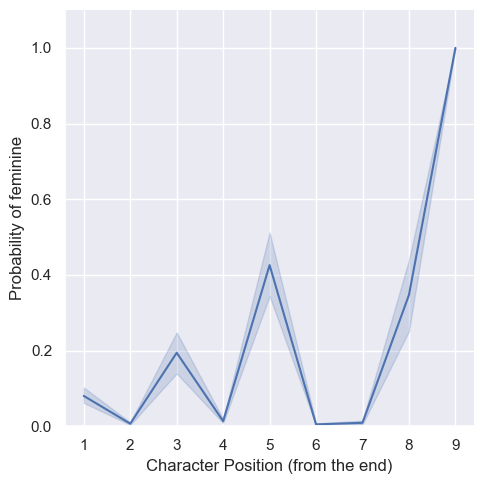

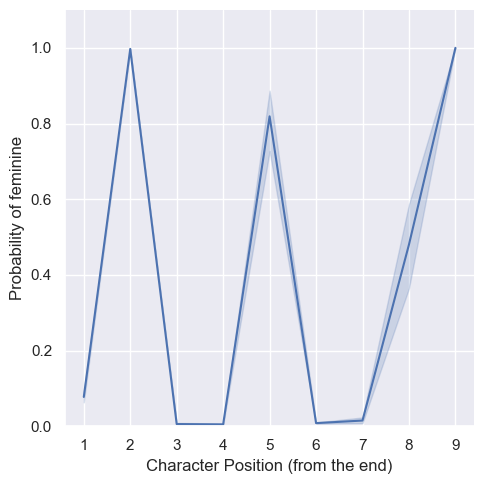

In [22]:
"""Average curve of an example word over multiple runs"""

sfx_avg = SuffixAverage(orth_reg_preds_x10.query("Form == 'gradation'"), 'ion')
sfx_avg.plot(gender='f', title=False, scale=[0, 1.1])

sfx_avg = SuffixAverage(orth_reg_preds_x10.query("Form == 'sensation'"), 'ion')
sfx_avg.plot(gender='f', title=False, scale=[0, 1.1])

### Phonemic Regular

In [ ]:
phon_reg = pd.read_csv('../results/echantinom_phon_preds_regular.csv')
# phon_reg = (phon_reg.join(echantinom.set_index('sg')[['suffix']], on='Form')
#               .drop_duplicates('Alt Form')
#               .reset_index(drop=True)
#               )
# phon_reg.to_csv('../results/echantinom_phon_preds_regular.csv', index=None)
phon_reg

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,suffix
0,o,eau,m,f,"[('o', {'f': 0.026426130905747414, 'm': 0.9735...",test,0
1,ɛ,ais,m,m,"[('ɛ', {'f': 0.009342508390545845, 'm': 0.9906...",test,0
2,ɛ,haie,m,m,"[('ɛ', {'f': 0.009342508390545845, 'm': 0.9906...",test,0
3,u,houx,m,m,"[('u', {'f': 0.03301820158958435, 'm': 0.96698...",test,0
4,4,hun,m,m,"[('4', {'f': 0.0528416745364666, 'm': 0.947158...",test,0
...,...,...,...,...,...,...,...
4526,3k2patibilite,incompatibilité,f,f,"[('3', {'f': 0.0021393918432295322, 'm': 0.997...",test,ité
4527,tɛʁʒivɛʁsasj2,tergiversation,f,f,"[('t', {'f': 0.4586411416530609, 'm': 0.541358...",test,ion
4528,ʁəstʁyktyʁasj2,restructuration,f,f,"[('ʁ', {'f': 0.06339559704065323, 'm': 0.93660...",test,ion
4529,tʁadisjOnalizm,traditionalisme,m,m,"[('t', {'f': 0.4586411416530609, 'm': 0.541358...",test,isme


In [42]:
phon_reg_correct = phon_reg[phon_reg['Predicted Gender'] == phon_reg['True Gender']]

phon_reg_accuracy = (phon_reg_correct.shape[0] / phon_reg.shape[0]) * 100
phon_reg_accuracy

80.48995806665195

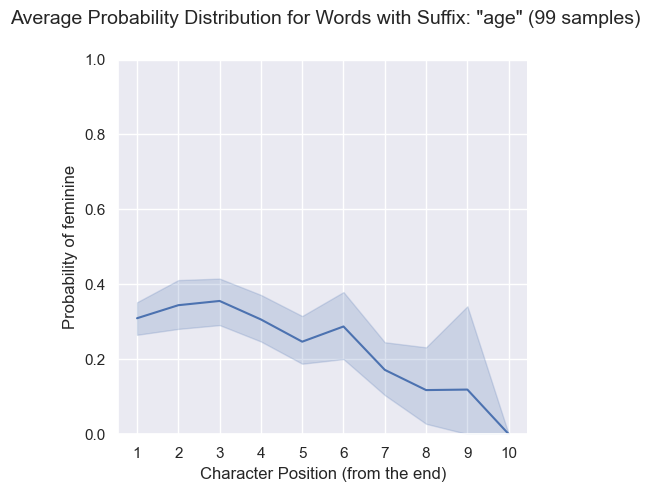

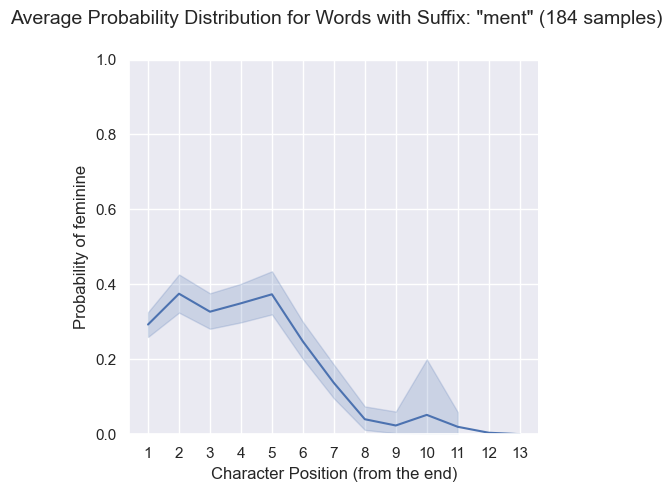

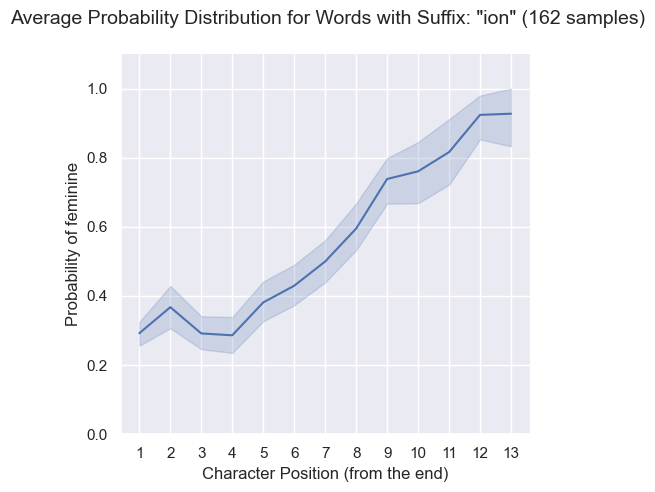

In [34]:
"""Uncomment to view the curves of individual example words"""

# view_curve(['pasaʒ'], phon_reg, binary=True, gender='f', scale=True)
# print('-' * 100 + '\n')
# view_curve(['liɲaʒ'], phon_reg, binary=True, gender='f', scale=True)
# print('-' * 100 + '\n')
# view_curve(['batim1'], phon_reg, binary=True, gender='f', scale=True)
# print('-' * 100 + '\n')
# view_curve(['viʁəm1'], phon_reg, binary=True, gender='f', scale=True)
# print('-' * 100 + '\n')
# view_curve(['fɔʁmasj2'], phon_reg, binary=True, gender='f', scale=True)
# print('-' * 100 + '\n')
# view_curve(['gʁadasj2'], phon_reg, binary=True, gender='f', scale=True)

age_avg = SuffixAverage(phon_reg, 'age')
age_avg.plot(gender='f', scale=True)

ment_avg = SuffixAverage(phon_reg, 'ment')
ment_avg.plot(gender='f', scale=True)

ion_avg = SuffixAverage(phon_reg, 'ion')
ion_avg.plot(gender='f', scale=[0, 1.1], min_dp=3)

In [40]:
phon_reg_x10 = pd.read_csv('../results/echantinom_phon_preds_x10_regular.csv')
# phon_reg_x10 = (phon_reg_x10.join(echantinom.set_index('sg')[['suffix']], on='Form')
#                   .drop_duplicates()
#                   .reset_index(drop=True)
#                   )
# phon_reg_x10.to_csv('../results/echantinom_phon_preds_x10_new.csv', index=None)
phon_reg_x10

,Form,Predicted Gender,True Gender,Class Probabilities,Set,Run
0,ɛ,m,m,"[('ɛ', {'f': 0.013354778289794922, 'm': 0.9866...",test,1
1,u,m,m,"[('u', {'f': 0.06221143528819084, 'm': 0.93778...",test,1
2,o,m,f,"[('o', {'f': 0.017807843163609505, 'm': 0.9821...",test,1
3,ɛ,m,f,"[('ɛ', {'f': 0.013354778289794922, 'm': 0.9866...",test,1
4,4,m,m,"[('4', {'f': 0.010410613380372524, 'm': 0.9895...",test,1
...,...,...,...,...,...,...
45315,3k2patibilite,f,f,"[('3', {'f': 0.0031695414800196886, 'm': 0.996...",test,10
45316,administʁatif,m,m,"[('a', {'f': 0.39524906873703003, 'm': 0.60475...",test,10
45317,ʁəstʁyktyʁasj2,f,f,"[('ʁ', {'f': 0.11711438745260239, 'm': 0.88288...",test,10
45318,tʁadisjOnalizm,m,m,"[('t', {'f': 0.4846509099006653, 'm': 0.515349...",test,10


In [44]:
phon_reg_x10_correct = phon_reg_x10[phon_reg_x10['Predicted Gender'] == phon_reg_x10['True Gender']]

phon_reg_accuracy = (phon_reg_x10_correct.shape[0] / phon_reg_x10.shape[0]) * 100
phon_reg_accuracy

80.8252427184466

In [38]:
"""Uncomment to view the curves of an example word at each run"""

# view_curve(['gʁadasj2'], phon_reg_preds_x10, binary=True, gender='f', multiruns=True)

'Uncomment to view the curves of an example word at each run'

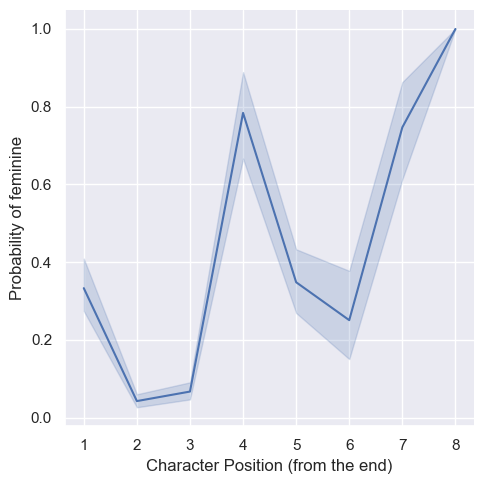

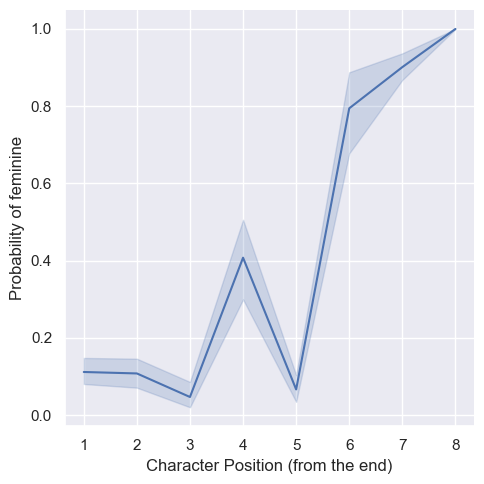

In [39]:
"""Average curve of an example word over multiple runs"""

sfx_avg = SuffixAverage(phon_reg_preds_x10.query("Form == 'gʁadasj2'"), 'ion')
sfx_avg.plot(gender='f', title=False)

sfx_avg = SuffixAverage(phon_reg_preds_x10.query("Form == 'fɔʁmasj2'"), 'ion')
sfx_avg.plot(gender='f', title=False)

### Comparing plots of multiple words

Run 1 of 10:


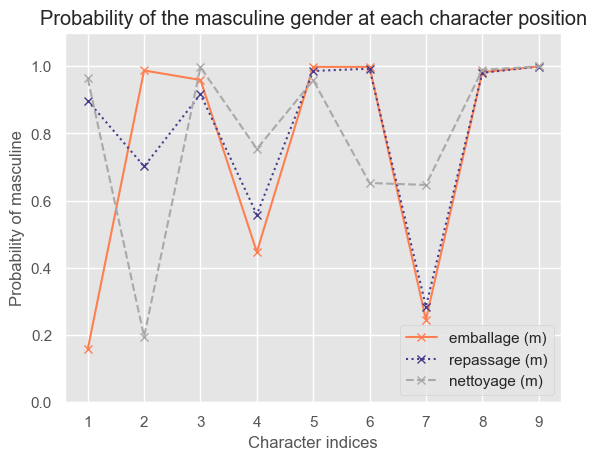

Run 2 of 10:


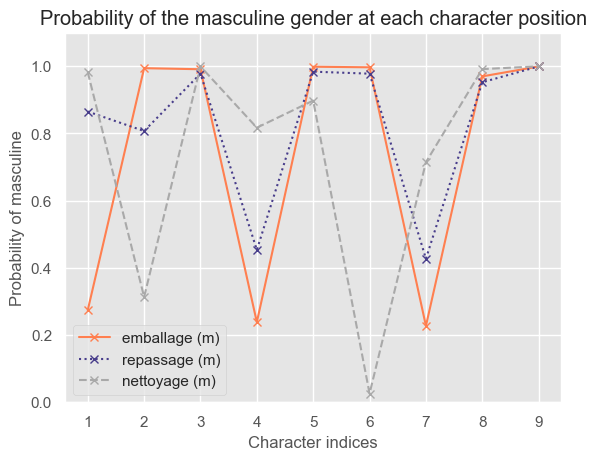

Run 3 of 10:


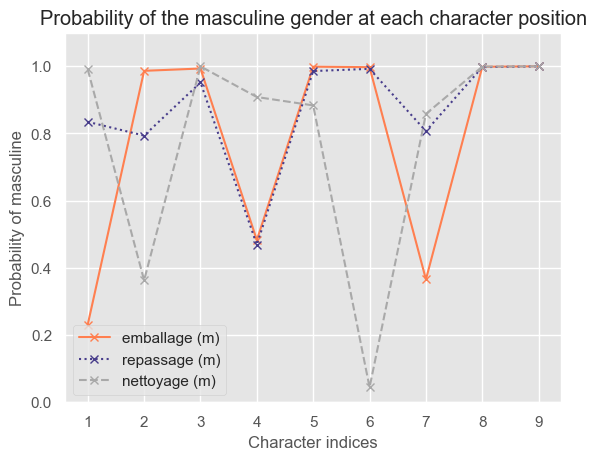

Run 4 of 10:


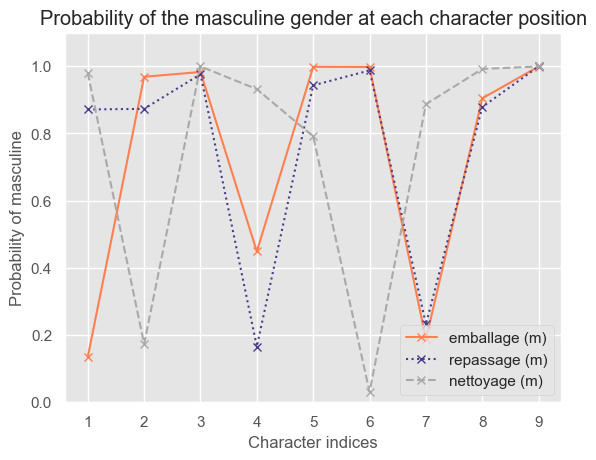

Run 5 of 10:


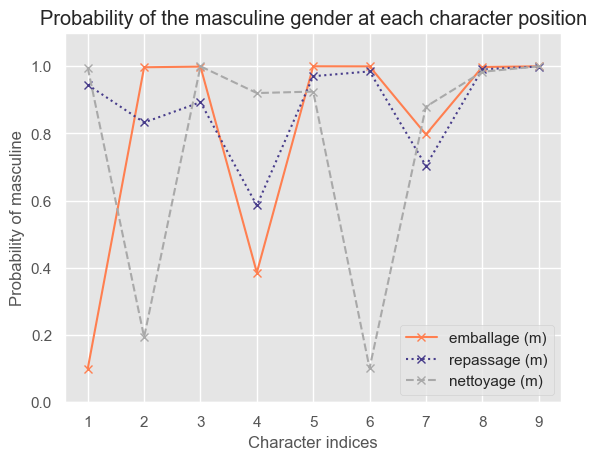

Run 6 of 10:


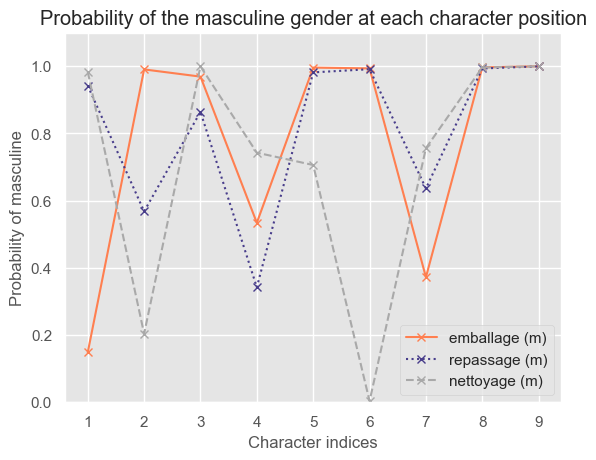

Run 7 of 10:


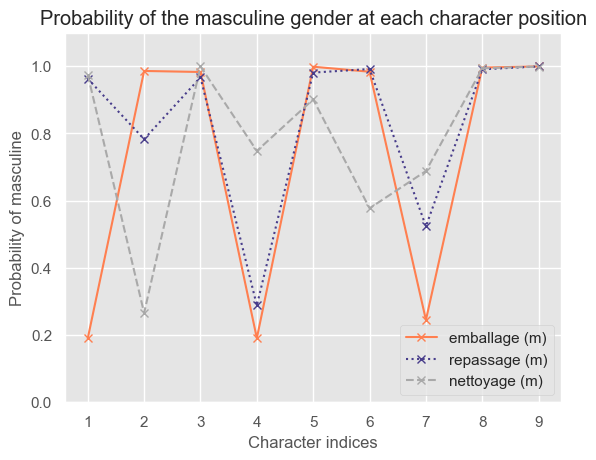

Run 8 of 10:


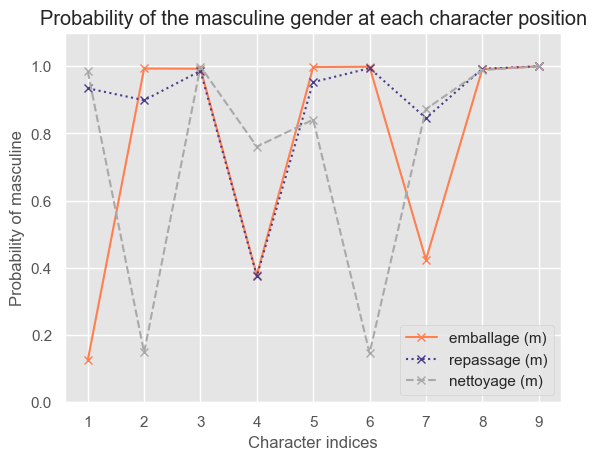

Run 9 of 10:


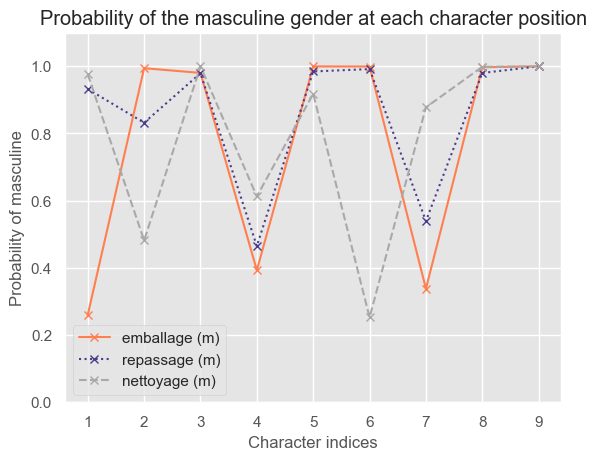

Run 10 of 10:


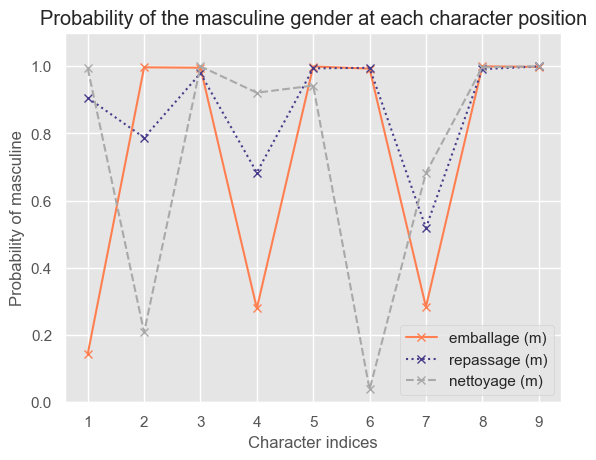

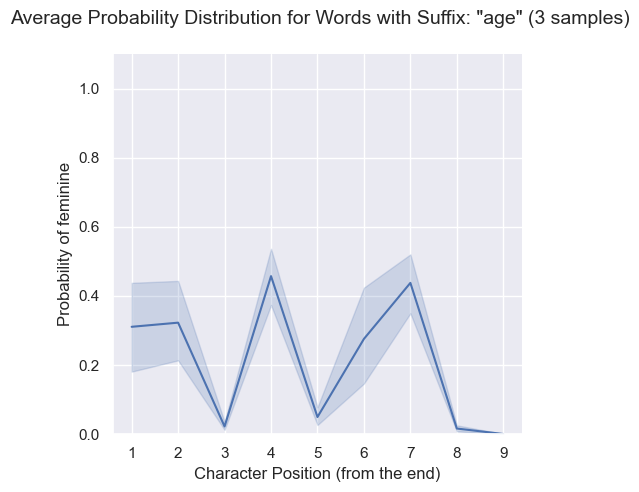

Run 1 of 10:


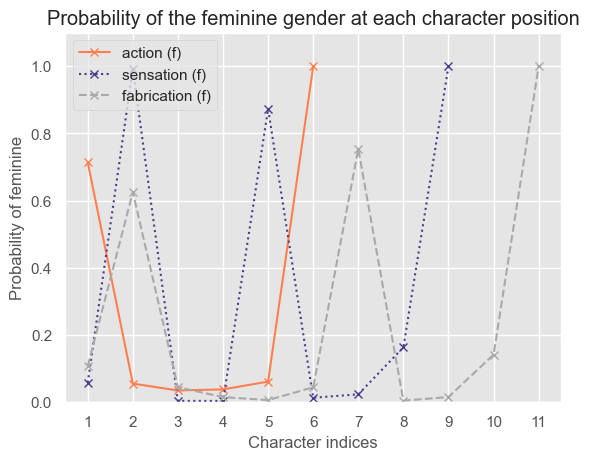

Run 2 of 10:


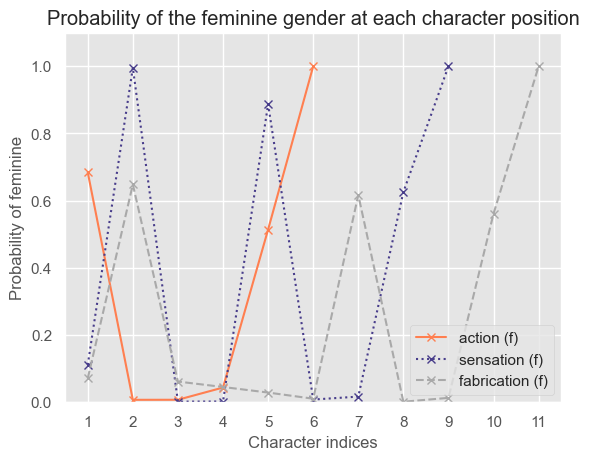

Run 3 of 10:


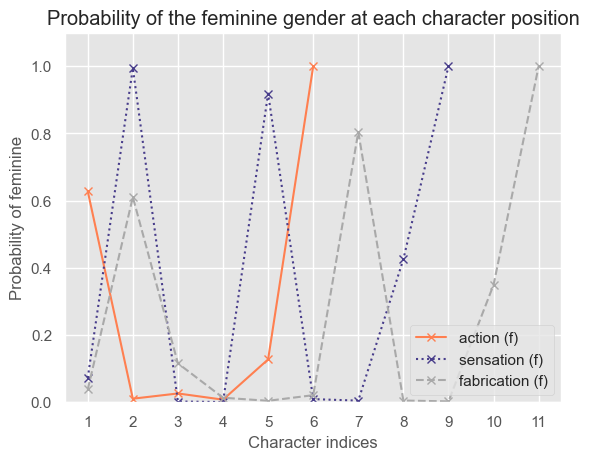

Run 4 of 10:


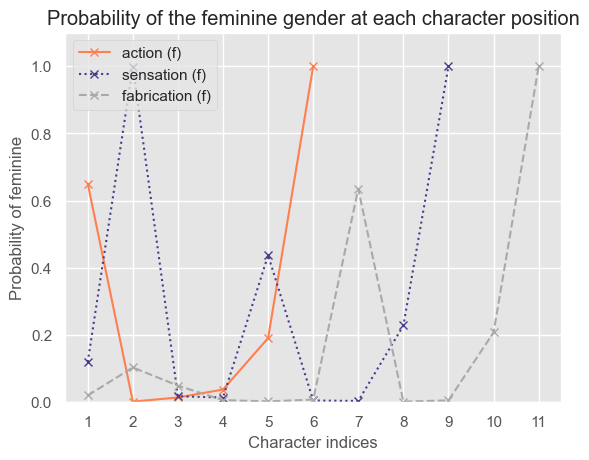

Run 5 of 10:


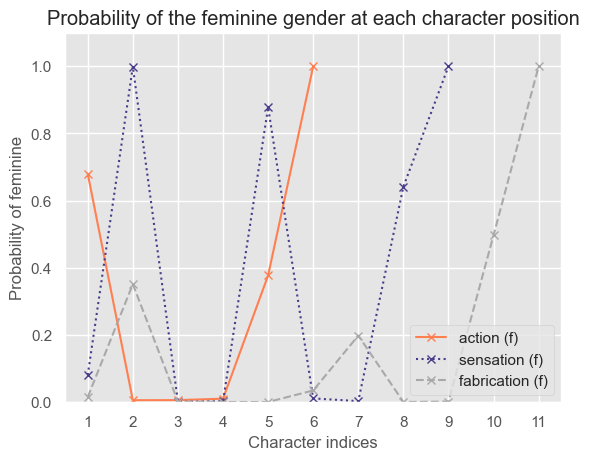

Run 6 of 10:


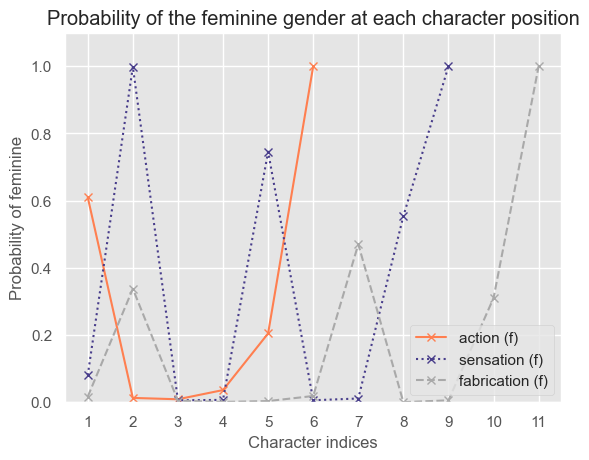

Run 7 of 10:


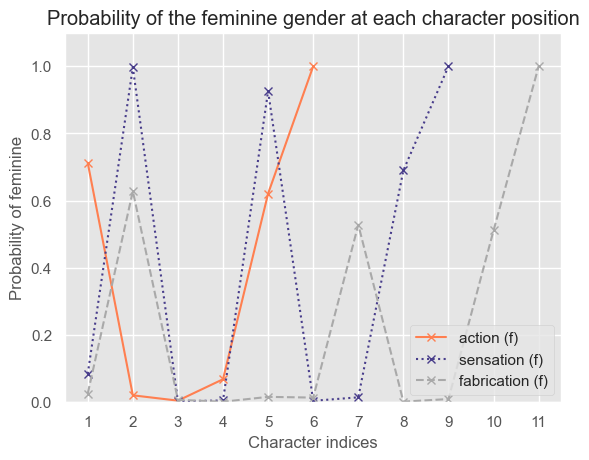

Run 8 of 10:


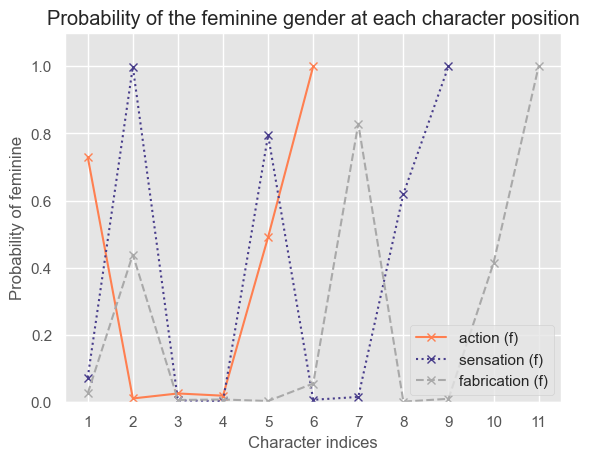

Run 9 of 10:


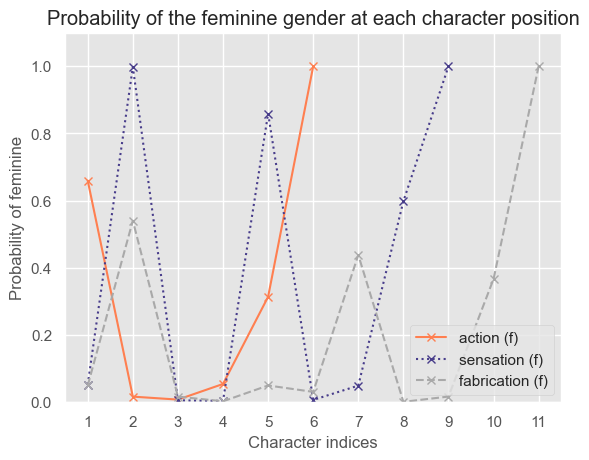

Run 10 of 10:


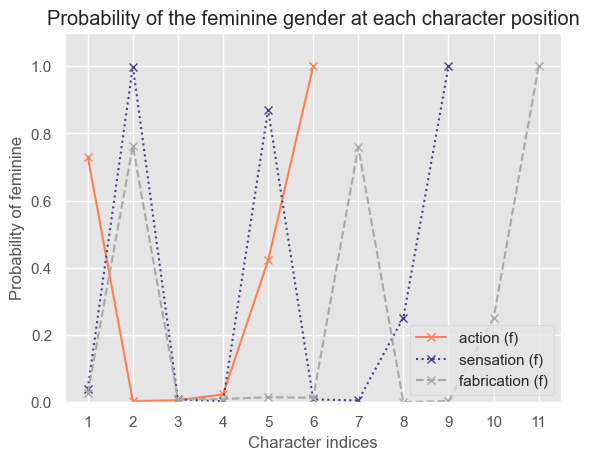

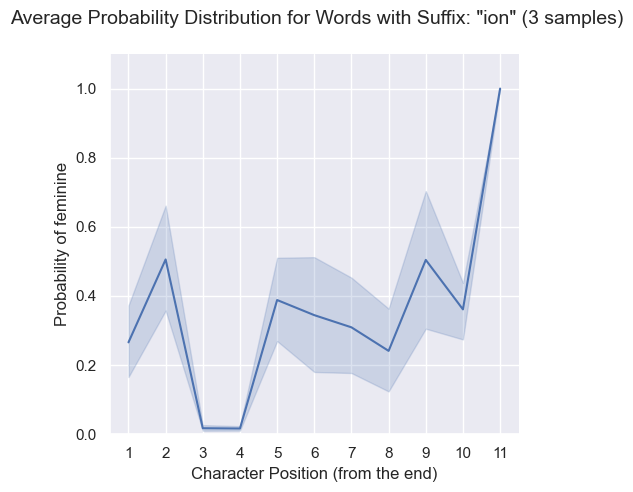

In [27]:
view_curve(['emballage', 'repassage', 'nettoyage'], orth_reg_preds_x10, binary=True, gender='m', multiruns=True, scale=[0, 1.1])
sfx_avg = SuffixAverage(orth_reg_preds_x10.query("Form in ['emballage', 'repassage', 'nettoyage']"), 'age')
sfx_avg.plot(gender='f', scale=[0, 1.1])

view_curve(['action', 'sensation', 'fabrication'], orth_reg_preds_x10, binary=True, gender='f', multiruns=True, scale=[0, 1.1])
sfx_avg = SuffixAverage(orth_reg_preds_x10.query("Form in ['action', 'sensation', 'fabrication']"), 'ion')
sfx_avg.plot(gender='f', scale=[0, 1.1])

## Comparison with reversed

In [ ]:
def compute_accuracy(filepath):
    df = pd.read_csv(filepath)
    correct = df[df['Predicted Gender'] == df['True Gender']]
    return (correct.shape[0] / df.shape[0]) * 100


filepaths = {
    "Orthographic": {
        "Regular": "../results/echantinom_orth_preds_x10_regular.csv",
        "Reversed": "../results/echantinom_orth_preds_x10_new.csv"
    },
    "Phonemic": {
        "Regular": "../results/echantinom_phon_preds_x10_regular.csv",
        "Reversed": "../results/echantinom_phon_preds_x10_new.csv"
    }
}

accuracy_table = {
    category: {variant: compute_accuracy(path) for variant, path in variants.items()}
    for category, variants in filepaths.items()
}

# Convert to DataFrame for a cross table format
df_accuracy = pd.DataFrame(accuracy_table)
df_accuracy


,Orthographic,Phonemic
Regular,89.916356,80.825243
Reversed,90.368572,80.795680
